In [91]:
import os, shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from tqdm.notebook import tqdm as tq

In [92]:
import cv2
import skimage

from PIL import Image
from skimage import io
from skimage.transform import resize, rotate, AffineTransform, warp
from skimage.exposure import adjust_gamma
from skimage.util import random_noise, img_as_ubyte

In [93]:
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from keras import Model, layers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications import MobileNetV2
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import TFSMLayer

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [100]:
trash_img = {}

path = "./Dataset_Final"

for i in os.listdir(path):
    trash_img[i] = os.listdir(os.path.join(path, i))

In [101]:
for i, class_name in enumerate(os.listdir(path)):
    print(i, class_name)

0 Sampah-Anorganik
1 Sampah-B3
2 Sampah-Elektronik
3 Sampah-Organik
4 Sampah-Residu


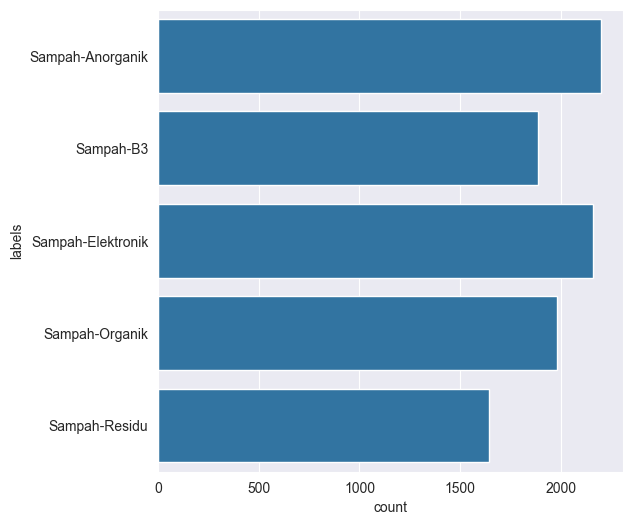

In [102]:
trash_path = "./Dataset_Final"

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(trash_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(os.path.basename(path))
        file_name.append(name)

distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, 'labels': labels})

Label = distribution_train['labels']
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [103]:
def anticlockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    sudut = random.randint(0, 180)
    return rotate(img, sudut)

def clockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    sudut = random.randint(0, 180)
    return rotate(img, -sudut)

def flip_up_down(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    return np.flipud(img)

def add_brightness(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    img = adjust_gamma(img, gamma=0.5, gain=1)
    return img

def blur_image(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    return cv2.GaussianBlur(img, (7, 7), 0)

def sheared(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    transform = AffineTransform(shear=0.25)
    shear_img = warp(img, transform, mode="wrap")
    return shear_img

def warp_shift(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    transform = AffineTransform(translation=(0, 30))
    warp_img = warp(img, transform, mode="wrap")
    return warp_img

In [104]:
transformations = {
    'rotate anticlockwise': anticlockwise_rotation,
    'rotate clockwise': clockwise_rotation,
    'warp shift': warp_shift,
    'bluring image': blur_image,
    'add brightness': add_brightness,
    'flip up down': flip_up_down,
    'shear image': sheared
}

data_classes = {
    "Sampah-B3": {
        "image_path": "./Dataset_Final/Sampah-B3",
        "augmented_path": "./Dataset_Final/Sampah-B3",
        "target": 300
    },
    "Sampah-Elektronik": {
        "image_path": "./Dataset_Final/Sampah-Elektronik", 
        "augmented_path": "./Dataset_Final/Sampah-Elektronik",
        "target": 50
    },
    "Sampah-Organik": {
        "image_path": "./Dataset_Final/Sampah-Organik",
        "augmented_path": "./Dataset_Final/Sampah-Organik",
        "target": 200
    },
    "Sampah-Residu": {
        "image_path": "./Dataset_Final/Sampah-Residu",
        "augmented_path": "./Dataset_Final/Sampah-Residu",
        "target": 500
    }
}

for kelas_data, data in data_classes.items():
    image_path = data["image_path"]
    augmented_path = data["augmented_path"]
    images_to_generate = data["target"]

    images = []

    for img in os.listdir(image_path):
        images.append(os.path.join(image_path, img))

    i = 1
    while i <= images_to_generate:
        image = random.choice(images)
        try:
            original_img = io.imread(image)
            transformed_img = None
            n = 0
            transformation_count = random.randint(1, len(transformations))

            while n <= transformation_count:
                key = random.choice(list(transformations))
                transformed_img = transformations[key](original_img)
                n =  n + 1
            
            original_name = os.path.basename(image)
            filename = f"{os.path.splitext(original_name)[0]}_augmented_{i}.jpg"
            new_image_path = os.path.join(image_path, filename)

            transformed_img = img_as_ubyte(transformed_img)
            cv2.imwrite(new_image_path, transformed_img)
            i += 1

        except ValueError as e:
            print('could not read the ', image, ' :', e, ' hence skipping it')


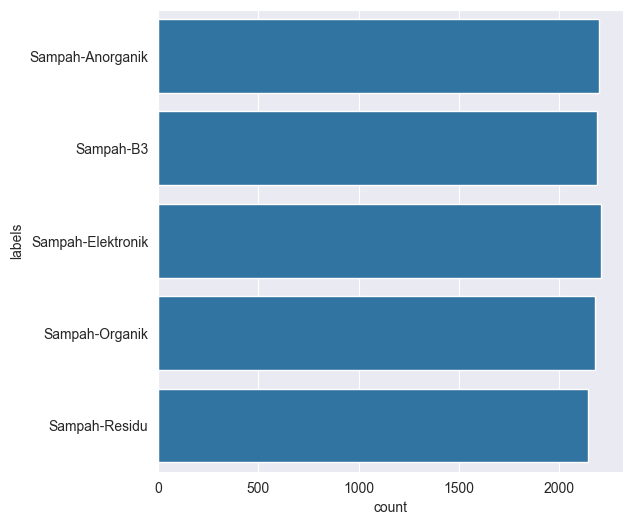

In [105]:
trash_path = "./Dataset_Final"

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(trash_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(os.path.basename(path))
        file_name.append(name)

distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, 'labels': labels})

Label = distribution_train['labels']
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [106]:
print(file_name[0], labels[0], full_path[0])

plastic1.jpg Sampah-Anorganik ./Dataset_Final\Sampah-Anorganik\plastic1.jpg


In [107]:
df = pd.DataFrame({"path": full_path, 'file_name': file_name, 'labels': labels})

df.groupby(['labels']).size()

labels
Sampah-Anorganik     2200
Sampah-B3            2189
Sampah-Elektronik    2210
Sampah-Organik       2182
Sampah-Residu        2144
dtype: int64

In [108]:
X = df['path']
y = df['labels']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [109]:
df_tr = pd.DataFrame({'path': x_train, 'labels': y_train, 'set': 'train'})
df_te = pd.DataFrame({'path': x_test, 'labels': y_test, 'set': 'test'})

In [110]:
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print(df_all.groupby(['set', 'labels']).size(), '\n')
print(df_all.sample(5))

set    labels           
test   Sampah-Anorganik      455
       Sampah-B3             442
       Sampah-Elektronik     410
       Sampah-Organik        433
       Sampah-Residu         445
train  Sampah-Anorganik     1745
       Sampah-B3            1747
       Sampah-Elektronik    1800
       Sampah-Organik       1749
       Sampah-Residu        1699
dtype: int64 

                                                   path            labels  \
7566         ./Dataset_Final\Sampah-Residu\trash479.jpg     Sampah-Residu   
713            ./Dataset_Final\Sampah-B3\battery977.jpg         Sampah-B3   
5119    ./Dataset_Final\Sampah-Anorganik\plastic640.jpg  Sampah-Anorganik   
5534   ./Dataset_Final\Sampah-Anorganik\plastic1315.jpg  Sampah-Anorganik   
4343  ./Dataset_Final\Sampah-B3\battery1413_augmente...         Sampah-B3   

        set  
7566  train  
713   train  
5119  train  
5534  train  
4343  train  


In [111]:
datasource_path  = "./Dataset_Final"
dataset_path = "./Dataset_Final_Preprocess"

In [112]:
for index, row in tq(df_all.iterrows()):
    file_path = row['path']

    if not os.path.exists(file_path):
        file_path = os.path.join(datasource_path, row['labels'], row['image'])

    dest_folder = os.path.join(dataset_path, row['set'], row['labels'])
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    destination_file_name = os.path.basename(file_path)

    file_dest = os.path.join(dest_folder, destination_file_name)

    if not os.path.exists(file_dest):
        shutil.copy2(file_path, file_dest)


0it [00:00, ?it/s]

In [113]:
TRAIN_DIR = "./Dataset_Final_Preprocess/train"
TEST_DIR = "./Dataset_Final_Preprocess/test"

train_anorganik = os.path.join(TRAIN_DIR + '/Sampah-Anorganik')
train_b3 = os.path.join(TRAIN_DIR + '/Sampah-B3')
train_elektronik = os.path.join(TRAIN_DIR + '/Sampah-Elektronik')
train_organik = os.path.join(TRAIN_DIR + '/Sampah-Organik')
train_residu = os.path.join(TRAIN_DIR + '/Sampah-Residu')
test_anorganik = os.path.join(TEST_DIR + '/Sampah-Anorganik')
test_b3 = os.path.join(TEST_DIR + '/Sampah-B3')
test_elektronik = os.path.join(TEST_DIR + '/Sampah-Elektronik')
test_organik = os.path.join(TEST_DIR + '/Sampah-Organik')
test_residu = os.path.join(TEST_DIR + '/Sampah-Residu')

print("Total sampah anorganik images di train set:", len(os.listdir(train_anorganik)))
print("Total sampah b3 images di train set:", len(os.listdir(train_b3)))
print("Total sampah elektronik images di train set:", len(os.listdir(train_elektronik)))
print("Total sampah organik images di train set:", len(os.listdir(train_organik)))
print("Total sampah residu images di train set:", len(os.listdir(train_residu)))
print("\n")
print("Total sampah anorganik images di test set:", len(os.listdir(test_anorganik)))
print("Total sampah b3 images di test set:", len(os.listdir(test_b3)))
print("Total sampah elektronik images di test set:", len(os.listdir(test_elektronik)))
print("Total sampah organik images di test set:", len(os.listdir(test_organik)))
print("Total sampah residu images di test set:", len(os.listdir(test_residu)))

Total sampah anorganik images di train set: 4996
Total sampah b3 images di train set: 3901
Total sampah elektronik images di train set: 3827
Total sampah organik images di train set: 3821
Total sampah residu images di train set: 3956


Total sampah anorganik images di test set: 1374
Total sampah b3 images di test set: 1168
Total sampah elektronik images di test set: 1172
Total sampah organik images di test set: 1163
Total sampah residu images di test set: 1236


In [114]:
datagen = ImageDataGenerator(rescale=1/.255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size = 32,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'training',
    shuffle = True
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size = 32,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'validation',
    shuffle = False
)

test_generator = datagen.flow_from_directory(
    TEST_DIR,
    batch_size = 1,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    shuffle = False
)

Found 16402 images belonging to 5 classes.
Found 4099 images belonging to 5 classes.
Found 6113 images belonging to 5 classes.


In [115]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze dulu

model_1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

In [61]:
# model_1 = Sequential()

# # (224, 224, 3) = 3 merupakan rgb
# model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
# model_1.add(BatchNormalization())
# model_1.add(MaxPool2D((2, 2)))

# model_1.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
# model_1.add(BatchNormalization())
# model_1.add(MaxPool2D((2, 2)))

# model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
# model_1.add(BatchNormalization())
# model_1.add(MaxPool2D((2, 2)))

# model_1.add(Flatten())

# model_1.add(Dense(256, activation='relu'))
# model_1.add(Dropout(0.5))

# model_1.add(Dense(128, activation='relu'))
# model_1.add(Dropout(0.5))

# model_1.add(Dense(64, activation='relu'))
# model_1.add(Dropout(0.3))

# model_1.add(Dense(5, activation='softmax'))

In [116]:
model_1.compile(
    optimizer = Adam(learning_rate=1e-4),
    loss = SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [117]:
print(model_1.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,619,461 (9.99 MB)

 Trainable params: 361,477 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [ ]:
# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.3,
#     patience=5,
#     min_lr=1e-6
# )

In [118]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.92):
            print("\nAkurasi telah mencapai > 92%")
            self.model.stop_training = True

callbacks = MyCallback()

In [119]:
count_anorganik, count_b3, count_elektronik, count_organik, count_residu = len(os.listdir(train_anorganik)), len(os.listdir(train_b3)), len(os.listdir(train_elektronik)), len(os.listdir(train_organik)), len(os.listdir(train_residu))
weight_0 = (1 / count_anorganik) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_1 = (1 / count_b3) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_2 = (1 / count_elektronik) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_3 = (1 / count_organik) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_4 = (1 / count_residu) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
 
class_weights = {0 : weight_0, 1 : weight_1, 2 : weight_2, 3 : weight_3, 4 : weight_4}

In [120]:
history_1 = model_1.fit(
    train_generator,
    batch_size=32,
    epochs=100,
    class_weight=class_weights,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

Epoch 1/100


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


513/513 ━━━━━━━━━━━━━━━━━━━━ 203s 391ms/step - accuracy: 0.4669 - loss: 1.3263 - val_accuracy: 0.6038 - val_loss: 1.0398
Epoch 2/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 241s 469ms/step - accuracy: 0.6077 - loss: 1.0323 - val_accuracy: 0.6433 - val_loss: 0.9597
Epoch 3/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 196s 381ms/step - accuracy: 0.6517 - loss: 0.9334 - val_accuracy: 0.6663 - val_loss: 0.9042
Epoch 4/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 206s 390ms/step - accuracy: 0.6810 - loss: 0.8591 - val_accuracy: 0.6760 - val_loss: 0.8802
Epoch 5/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 199s 384ms/step - accuracy: 0.6985 - loss: 0.8113 - val_accuracy: 0.6933 - val_loss: 0.8582
Epoch 6/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 251s 479ms/step - accuracy: 0.7161 - loss: 0.7708 - val_accuracy: 0.6916 - val_loss: 0.8424
Epoch 7/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 155s 301ms/step - accuracy: 0.7350 - loss: 0.7323 - val_accuracy: 0.6955 - val_loss: 0.8287
Epoch 8/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 192s 374ms/step - accuracy: 0.7406 - los

In [121]:
model_1.evaluate(test_generator, batch_size=5)

6113/6113 ━━━━━━━━━━━━━━━━━━━━ 93s 15ms/step - accuracy: 0.8768 - loss: 0.4196


[0.4195590317249298, 0.876819908618927]

129/129 ━━━━━━━━━━━━━━━━━━━━ 31s 231ms/step


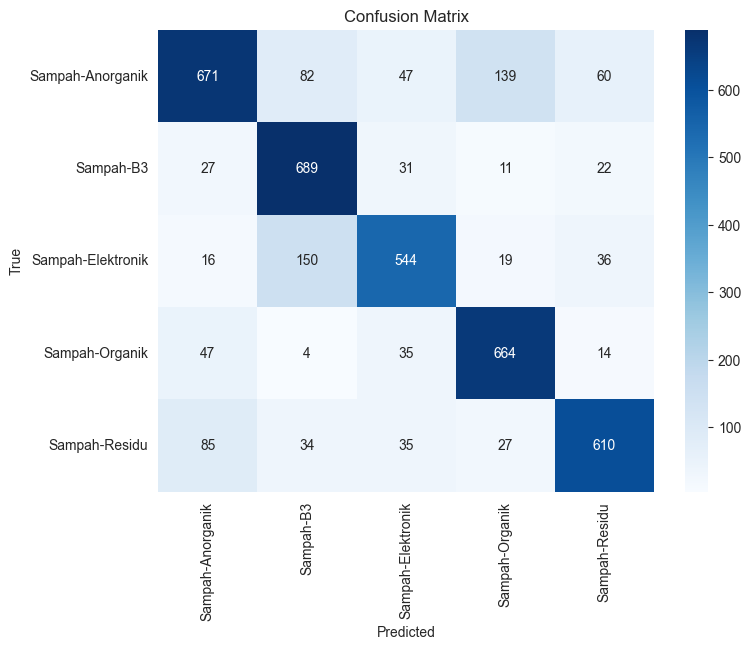

Classification Report:

                   precision    recall  f1-score   support

 Sampah-Anorganik       0.79      0.67      0.73       999
        Sampah-B3       0.72      0.88      0.79       780
Sampah-Elektronik       0.79      0.71      0.75       765
   Sampah-Organik       0.77      0.87      0.82       764
    Sampah-Residu       0.82      0.77      0.80       791

         accuracy                           0.78      4099
        macro avg       0.78      0.78      0.78      4099
     weighted avg       0.78      0.78      0.77      4099



In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# Prediksi di validation/test set
# -----------------------------
y_true = validation_generator.classes  # label asli
y_pred_probs = model_1.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)  # ambil kelas dengan probabilitas tertinggi

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_true, y_pred)
class_labels = list(validation_generator.class_indices.keys())  # nama kelas

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


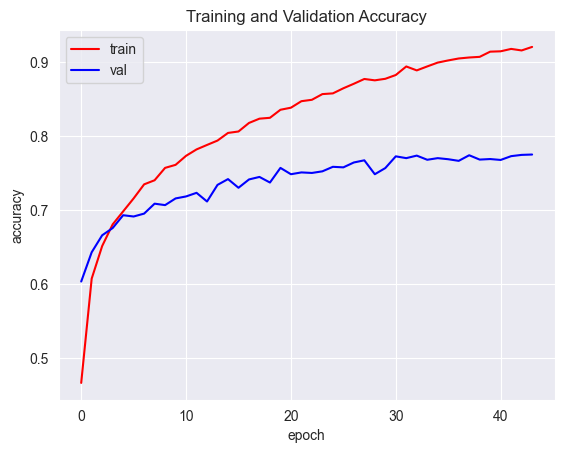

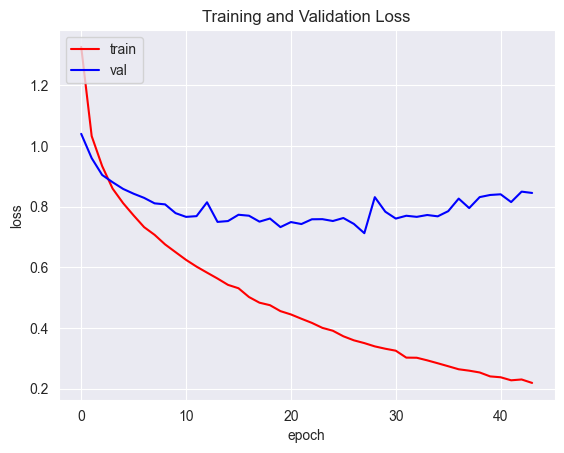

In [123]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
 
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

In [124]:
model_1.save("model.h5")

In [125]:
model = tf.keras.models.load_model('./model.h5')

In [126]:
# Buat converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# (Optional) Optimisasi ukuran
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi
tflite_model = converter.convert()

# Simpan model .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpvsp97z8m\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpvsp97z8m\assets


Saved artifact at 'C:\Users\USER\AppData\Local\Temp\tmpvsp97z8m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_9')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2386992904912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729458128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729461776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386992898192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729462352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729466000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729457936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729457744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729457360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2386729466384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  23867

In [127]:
print(tf.__version__)

2.20.0


In [144]:
class_names = train_generator.class_indices
print(class_names)

{'Sampah-Anorganik': 0, 'Sampah-B3': 1, 'Sampah-Elektronik': 2, 'Sampah-Organik': 3, 'Sampah-Residu': 4}


In [153]:
# Load model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Ambil detail input & output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

labels = ["anorganik", "b3", "elektronik", "organik", "residu"]

# Fungsi preprocessing gambar
def preprocess_image(image_path, input_shape):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((input_shape[1], input_shape[2]))
    img = np.array(img, dtype=input_details[0]['dtype'])
    img = np.expand_dims(img, axis=0) 
    return img

# Uji 1 gambar
image_path = "2.jpg"
input_shape = input_details[0]['shape']
img = preprocess_image(image_path, input_shape)

# Set input
interpreter.set_tensor(input_details[0]['index'], img)

# Run inference
interpreter.invoke()

# Ambil output
output_data = interpreter.get_tensor(output_details[0]['index'])[0]
pred_idx = np.argmax(output_data)
pred_label = labels[pred_idx]
confidence = output_data[pred_idx]

print(f"Prediksi: {pred_label} ({confidence:.2f})")


Prediksi: b3 (1.00)
